In [ ]:
import arcpy

In [ ]:
# Set environment settings
arcpy.env.workspace = r"C:\Users\thier\Downloads\Projet\Projet"

In [ ]:
# Set local variables
inRaster = "Utilisation_Territoire.tif"
outPolygons = "test.shp"
field = "DESC_CAT"

# Run RasterToPolygon
arcpy.conversion.RasterToPolygon(inRaster, outPolygons, "NO_SIMPLIFY", field)

In [ ]:
import pandas


In [ ]:
shapefile = "buffers_2km.shp" # Replace with your shapefile name

# Use a search cursor to iterate through the shapefile
with arcpy.da.SearchCursor(shapefile, ["*"]) as cursor:
    for row in cursor:
        print(row)  # or any operation you want to perform


In [ ]:
# Set local variables
in_features = "test.shp"
clip_features = "buffers_1km.shp"
out_feature_class = "buffer_sol_1km_test3.shp"
xy_tolerance = ""

# Run Clip
arcpy.analysis.Clip(in_features, clip_features, out_feature_class)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
import whitebox
wbt = whitebox.WhiteboxTools()


In [ ]:
wbt.clip(
    i=r"C:\Users\thier\Downloads\Projet\Projet\test.shp", 
    clip=r"C:\Users\thier\Downloads\Projet\Projet\buffers_2km.shp", 
    output=r"C:\Users\thier\Downloads\Projet\Projet\clip_test2.shp"
)

In [ ]:
gdf = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\clip_test2.shp")
gdf.head(50)

In [ ]:
coupe_rows = gdf[gdf['DESC_CAT'].str.contains('Non', case=False, na=False)]
coupe_rows

In [149]:
new_name = 'Coupe'
gdf.loc[gdf['DESC_CAT'] == 'Coupe et rÃ©gÃ©nÃ©rat', 'DESC_CAT'] = new_name
new_name2 = "NA"
gdf.loc[gdf['DESC_CAT'] == 'Non classifiÃ©', 'DESC_CAT'] = new_name2


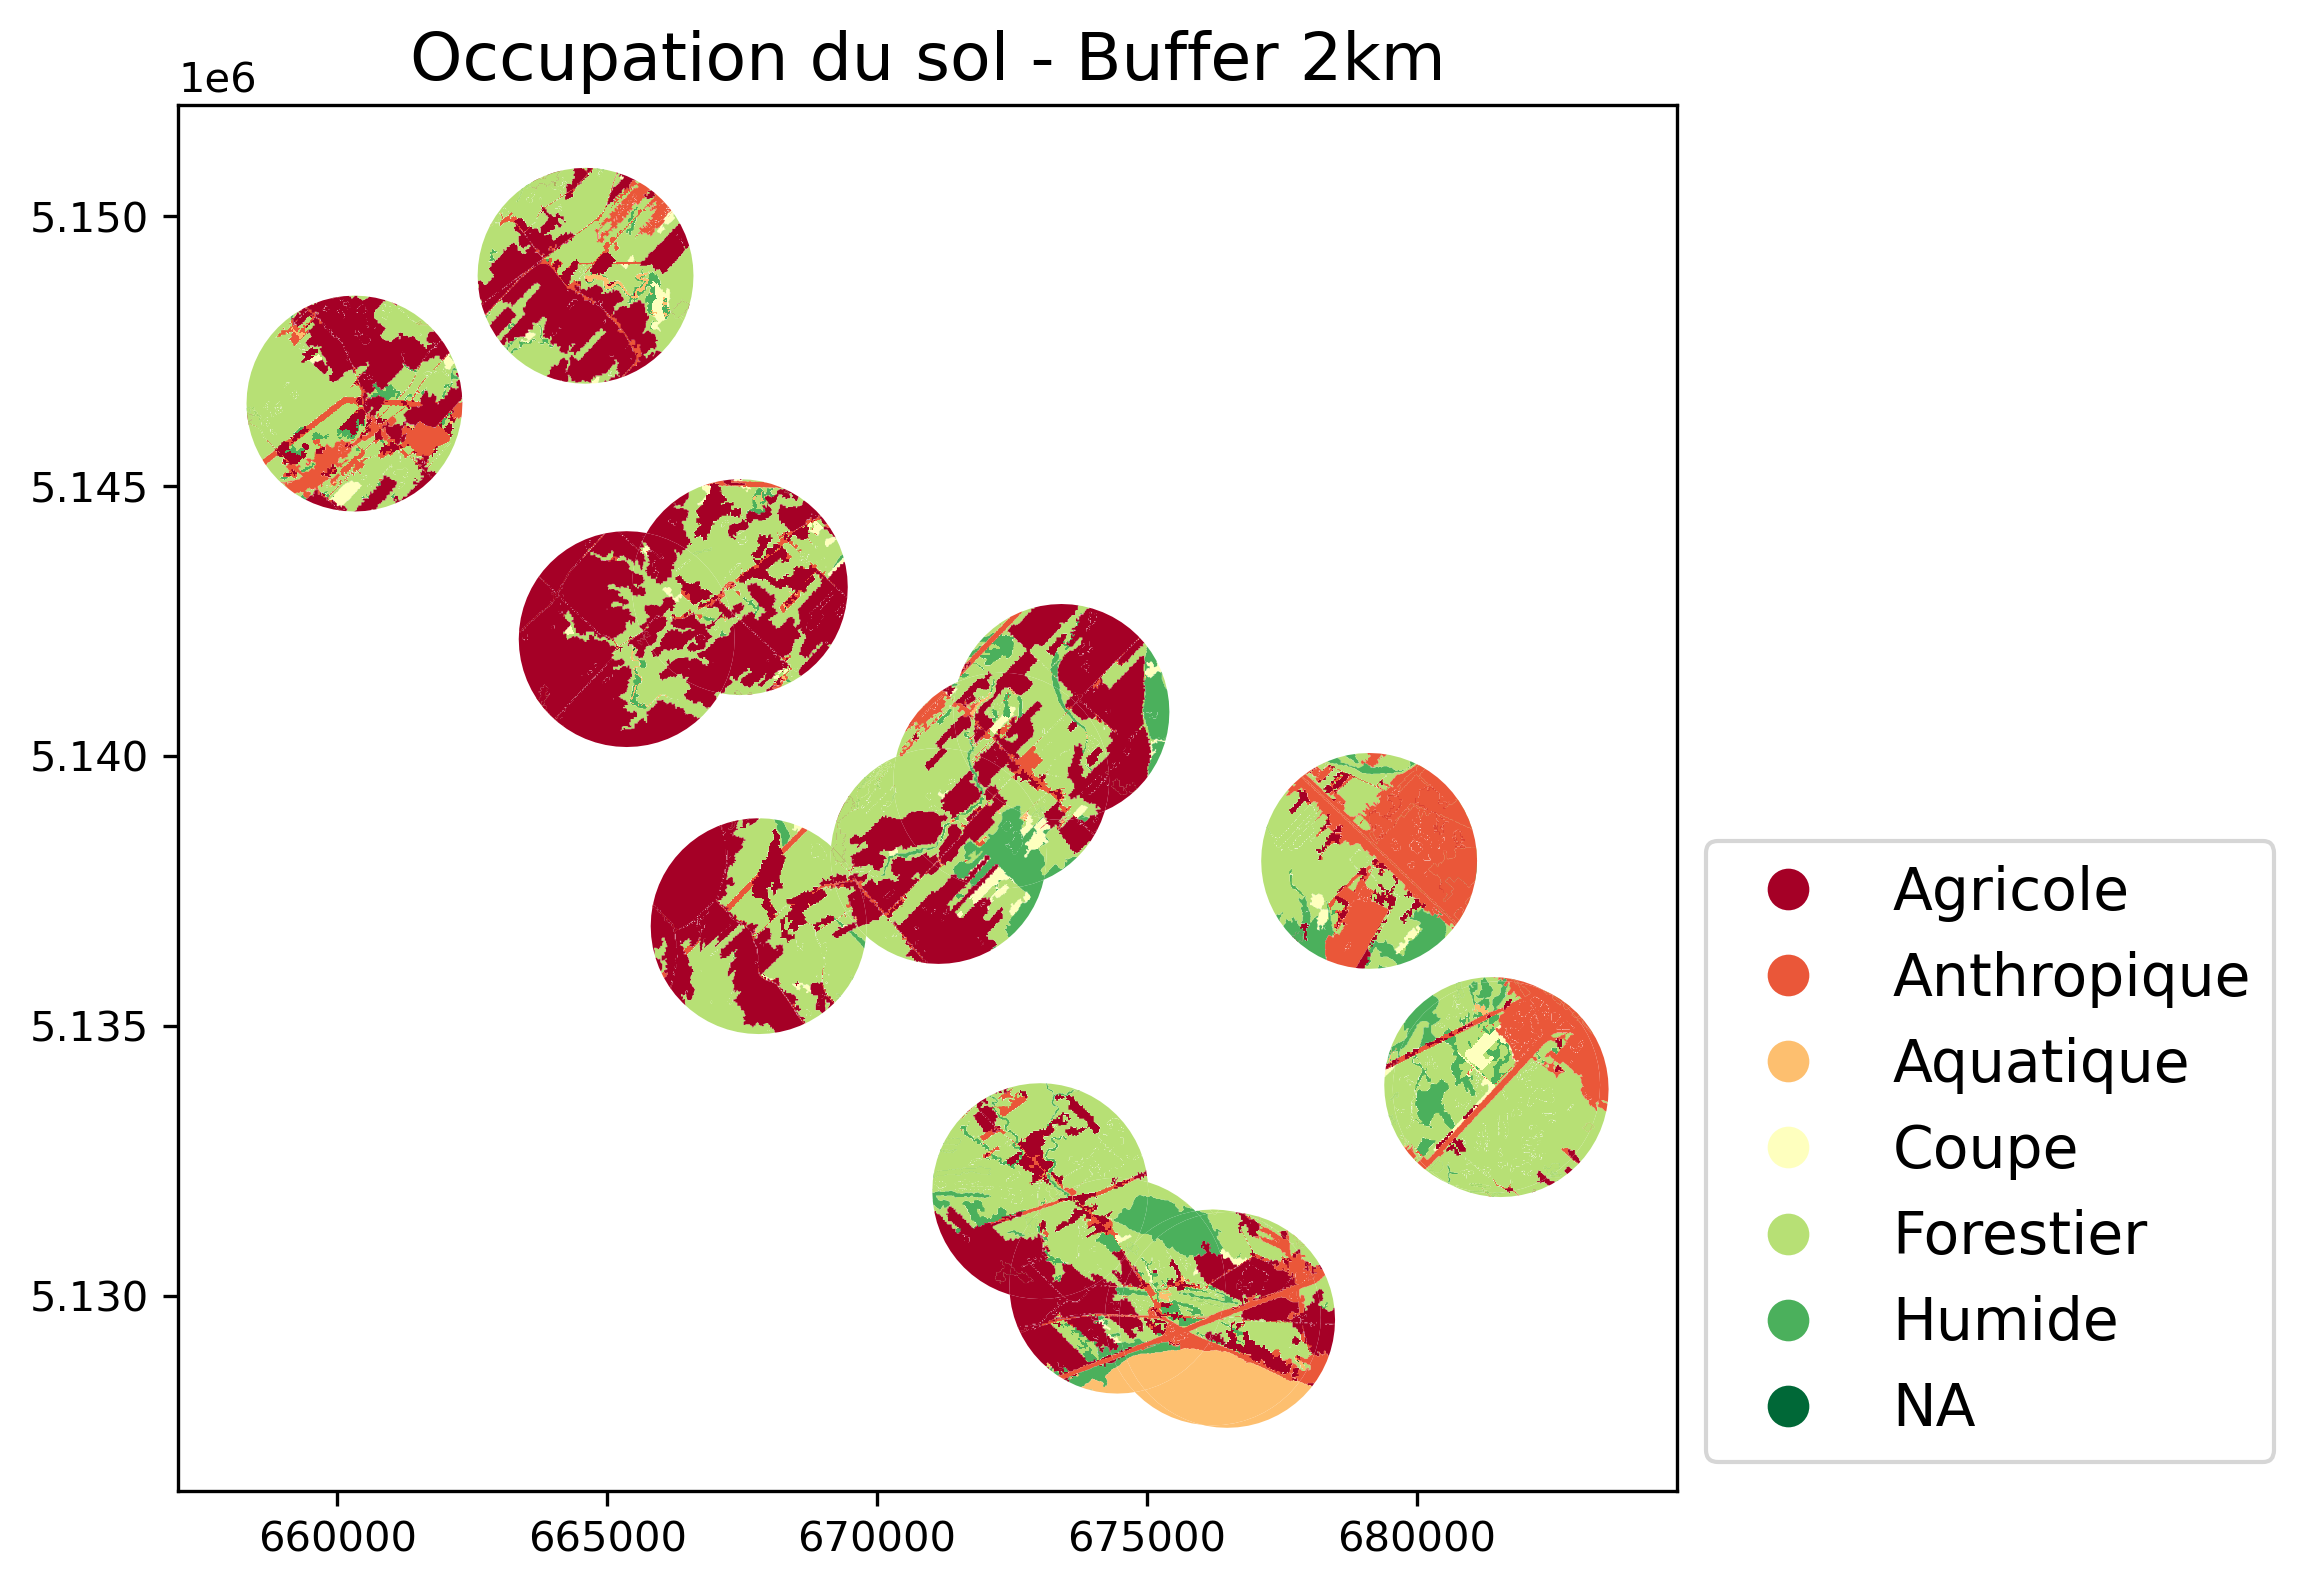

In [169]:
import geopandas as gpd
import matplotlib.pyplot as plt

# I'm assuming gdf is your GeoDataFrame and it has a column 'id' for identification
# Load or define your gdf here
# gdf = gpd.read_file('your_file.shp') or other GeoDataFrame operations

fig, ax = plt.subplots(dpi= 300, figsize=(10, 6))
gdf.plot(column='DESC_CAT', cmap='RdYlGn', legend=True, ax=ax,
         legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0), 'fontsize': 14})

ax.set_title("Occupation du sol - Buffer 2km", fontsize=16)

plt.show()


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_500m.csv")
df2 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_2km.csv")
df3 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_1km.csv")

In [ ]:
df1_selected = df1[['Clipped Length']].rename(columns={'Clipped Length': '500m'}) 
df2_selected = df2[['Clipped Length']].rename(columns={'Clipped Length': '1km'})
df3_selected = df3[['Clipped Length']].rename(columns={'Clipped Length': '2km'})


In [ ]:
combined_df = pd.concat([df1_selected, df2_selected, df3_selected], axis=1)
combined_df

In [ ]:
combined_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_all.csv")
combined_df

In [ ]:
sol1km=pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_1km_test.csv")
sol1km

In [ ]:
new_name = 'Coupe'
sol1km.loc[sol1km['Type sol'] == 'Coupe et régénérat', 'Type sol'] = new_name

In [ ]:
sol1km[sol1km['Type sol'].str.contains('Coupe', case=False, na=False)]

C:\Users\thier\AppData\Local\Temp\ipykernel_20488\2033206450.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn', n_types)


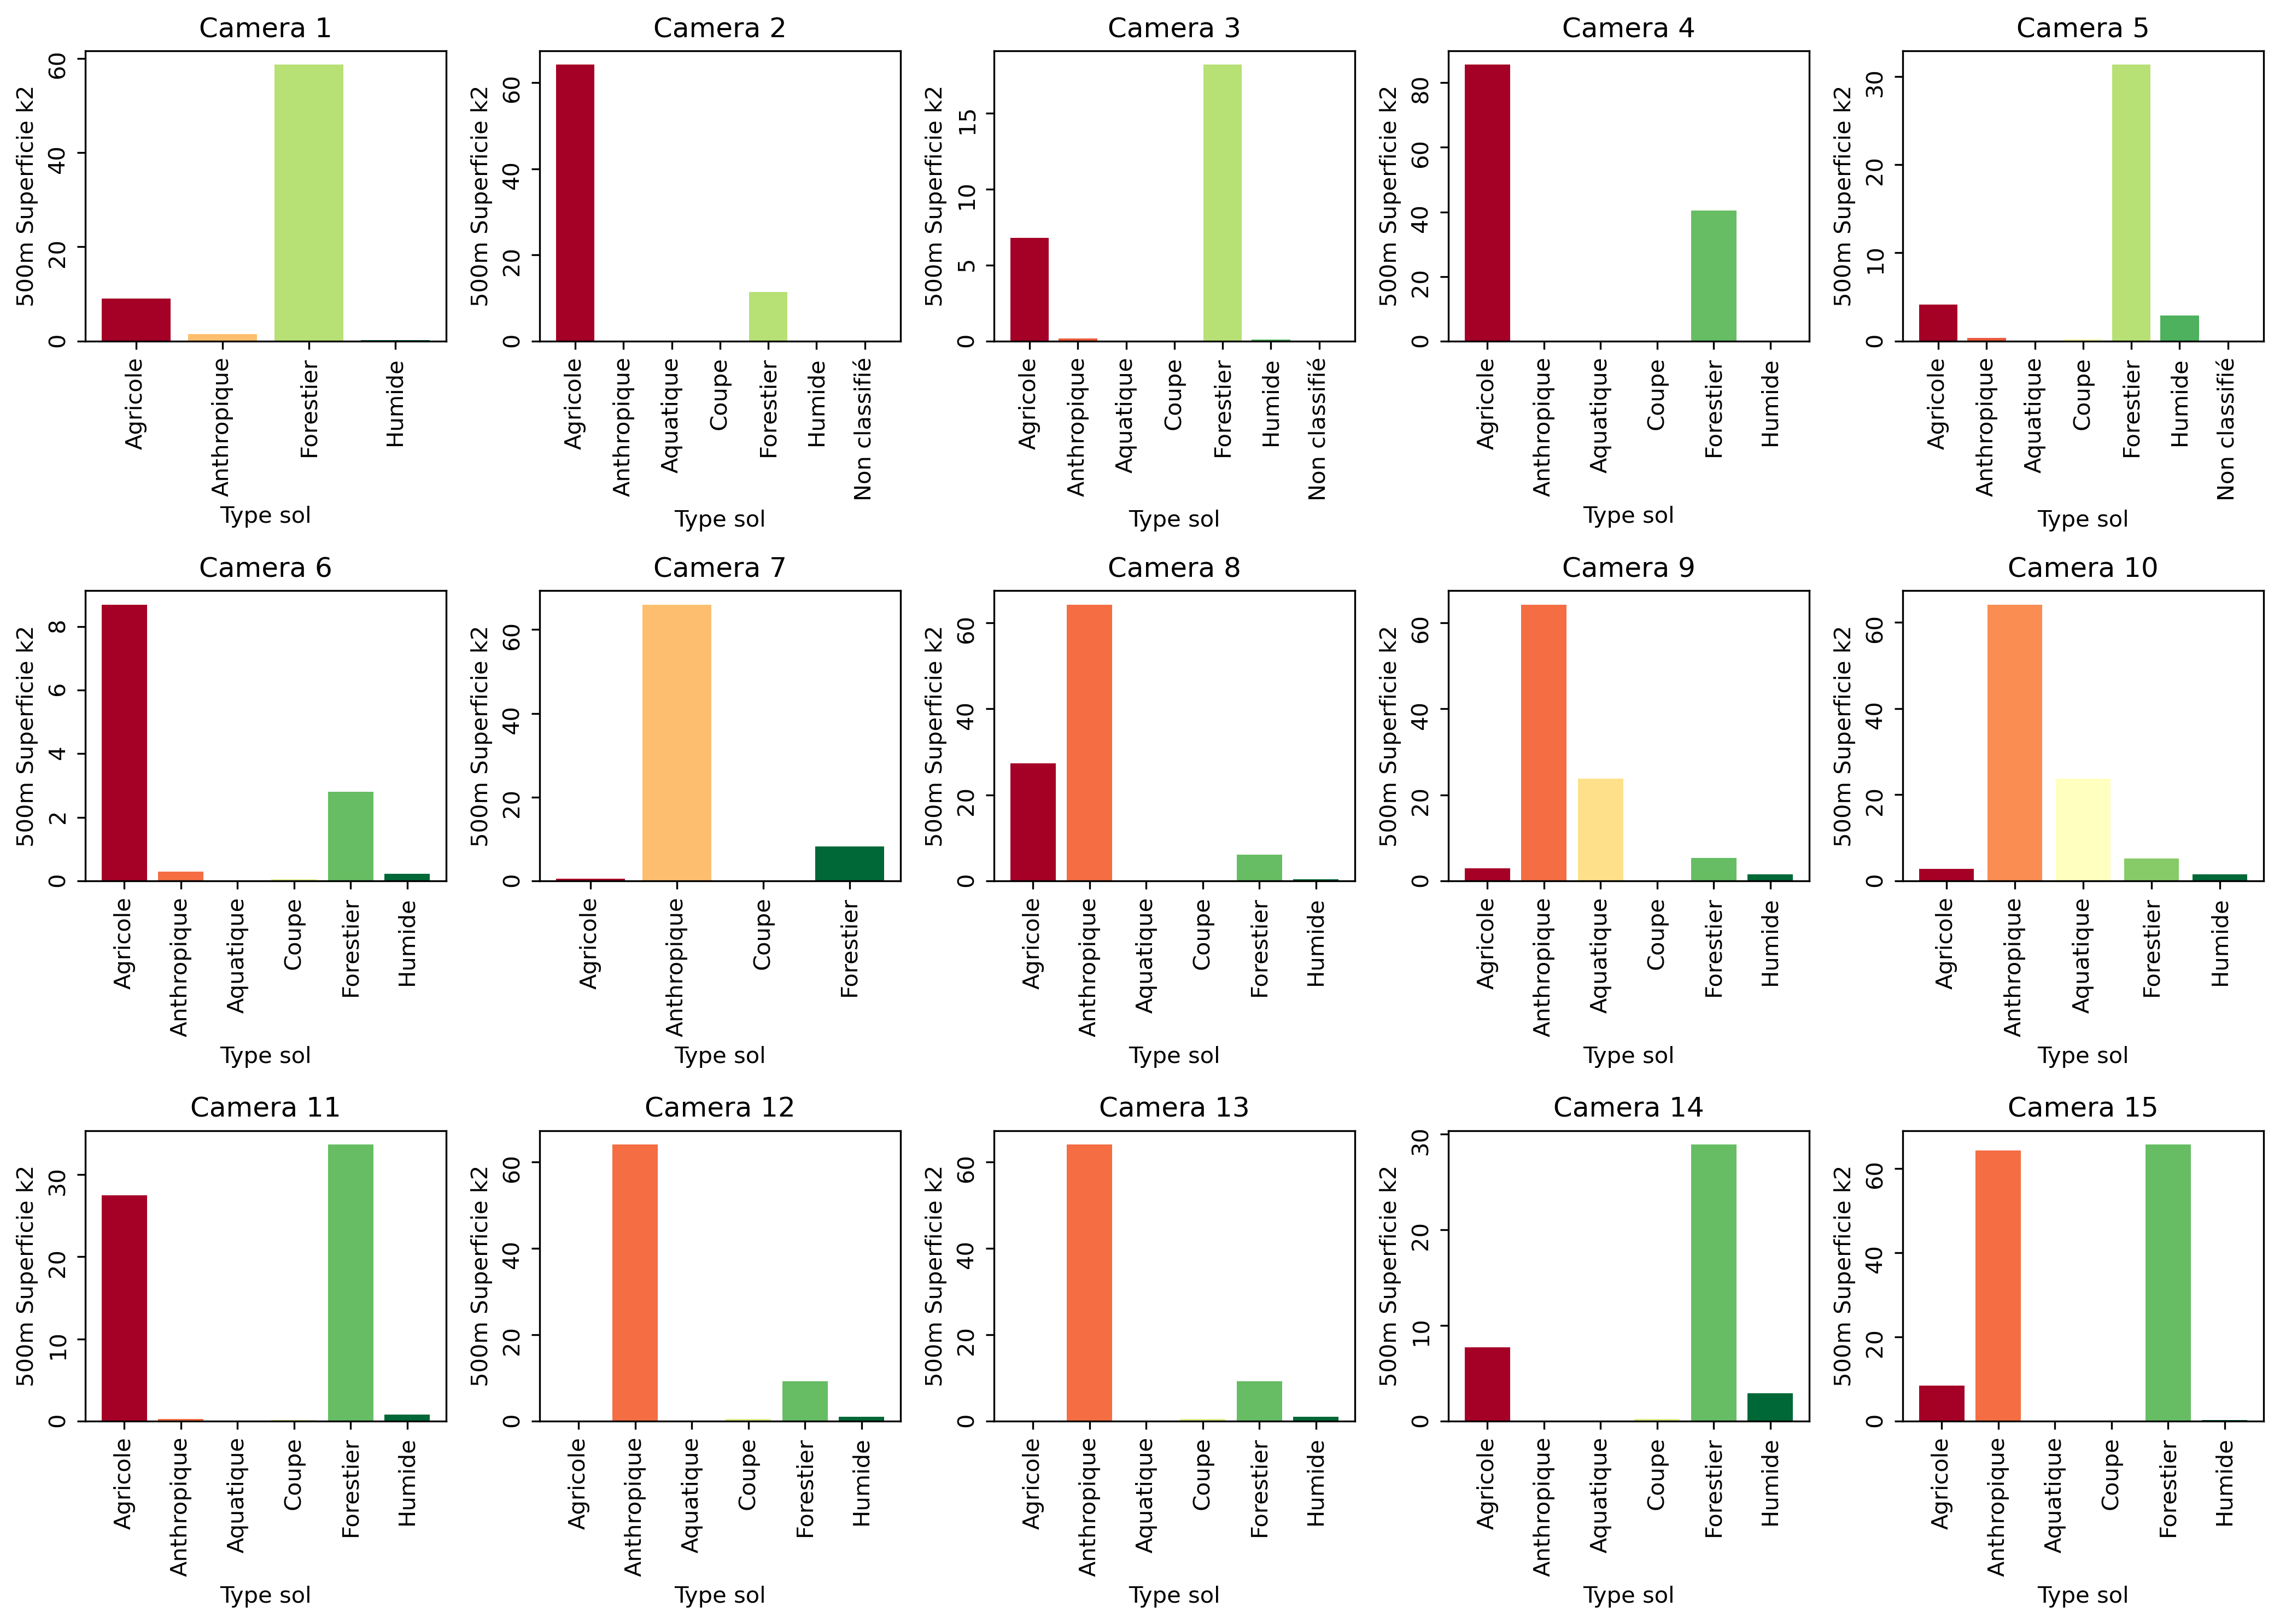

In [168]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define the layout of your subplots (3 rows and 5 columns)
fig, axs = plt.subplots(3, 5, figsize=(14, 10), dpi=300)  # Adjust the size as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(15):  
    sol_specific = sol1km[sol1km['id'] == i]
    ax = axs[i]

    # Plotting
    types = sol_specific['Type sol'].unique()
    n_types = len(types)
    
    # Create a color map
    cmap = cm.get_cmap('RdYlGn', n_types)
    colors = [cmap(i) for i in range(n_types)]

    for j, type in enumerate(types):
        ax.bar(type, sol_specific[sol_specific['Type sol'] == type]['500m_Superficie_k2'], 
               color=colors[j])
    
    ax.set_title(f'Camera {i + 1}')
    ax.set_xlabel('Type sol')
    ax.set_ylabel('500m Superficie k2')
    ax.tick_params(labelrotation=90)  # Rotate labels
    

# Adjust layout
plt.tight_layout()

# Show the full plot
plt.show()


C:\Users\thier\AppData\Local\Temp\ipykernel_20488\1019292402.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Dark2', n_types)


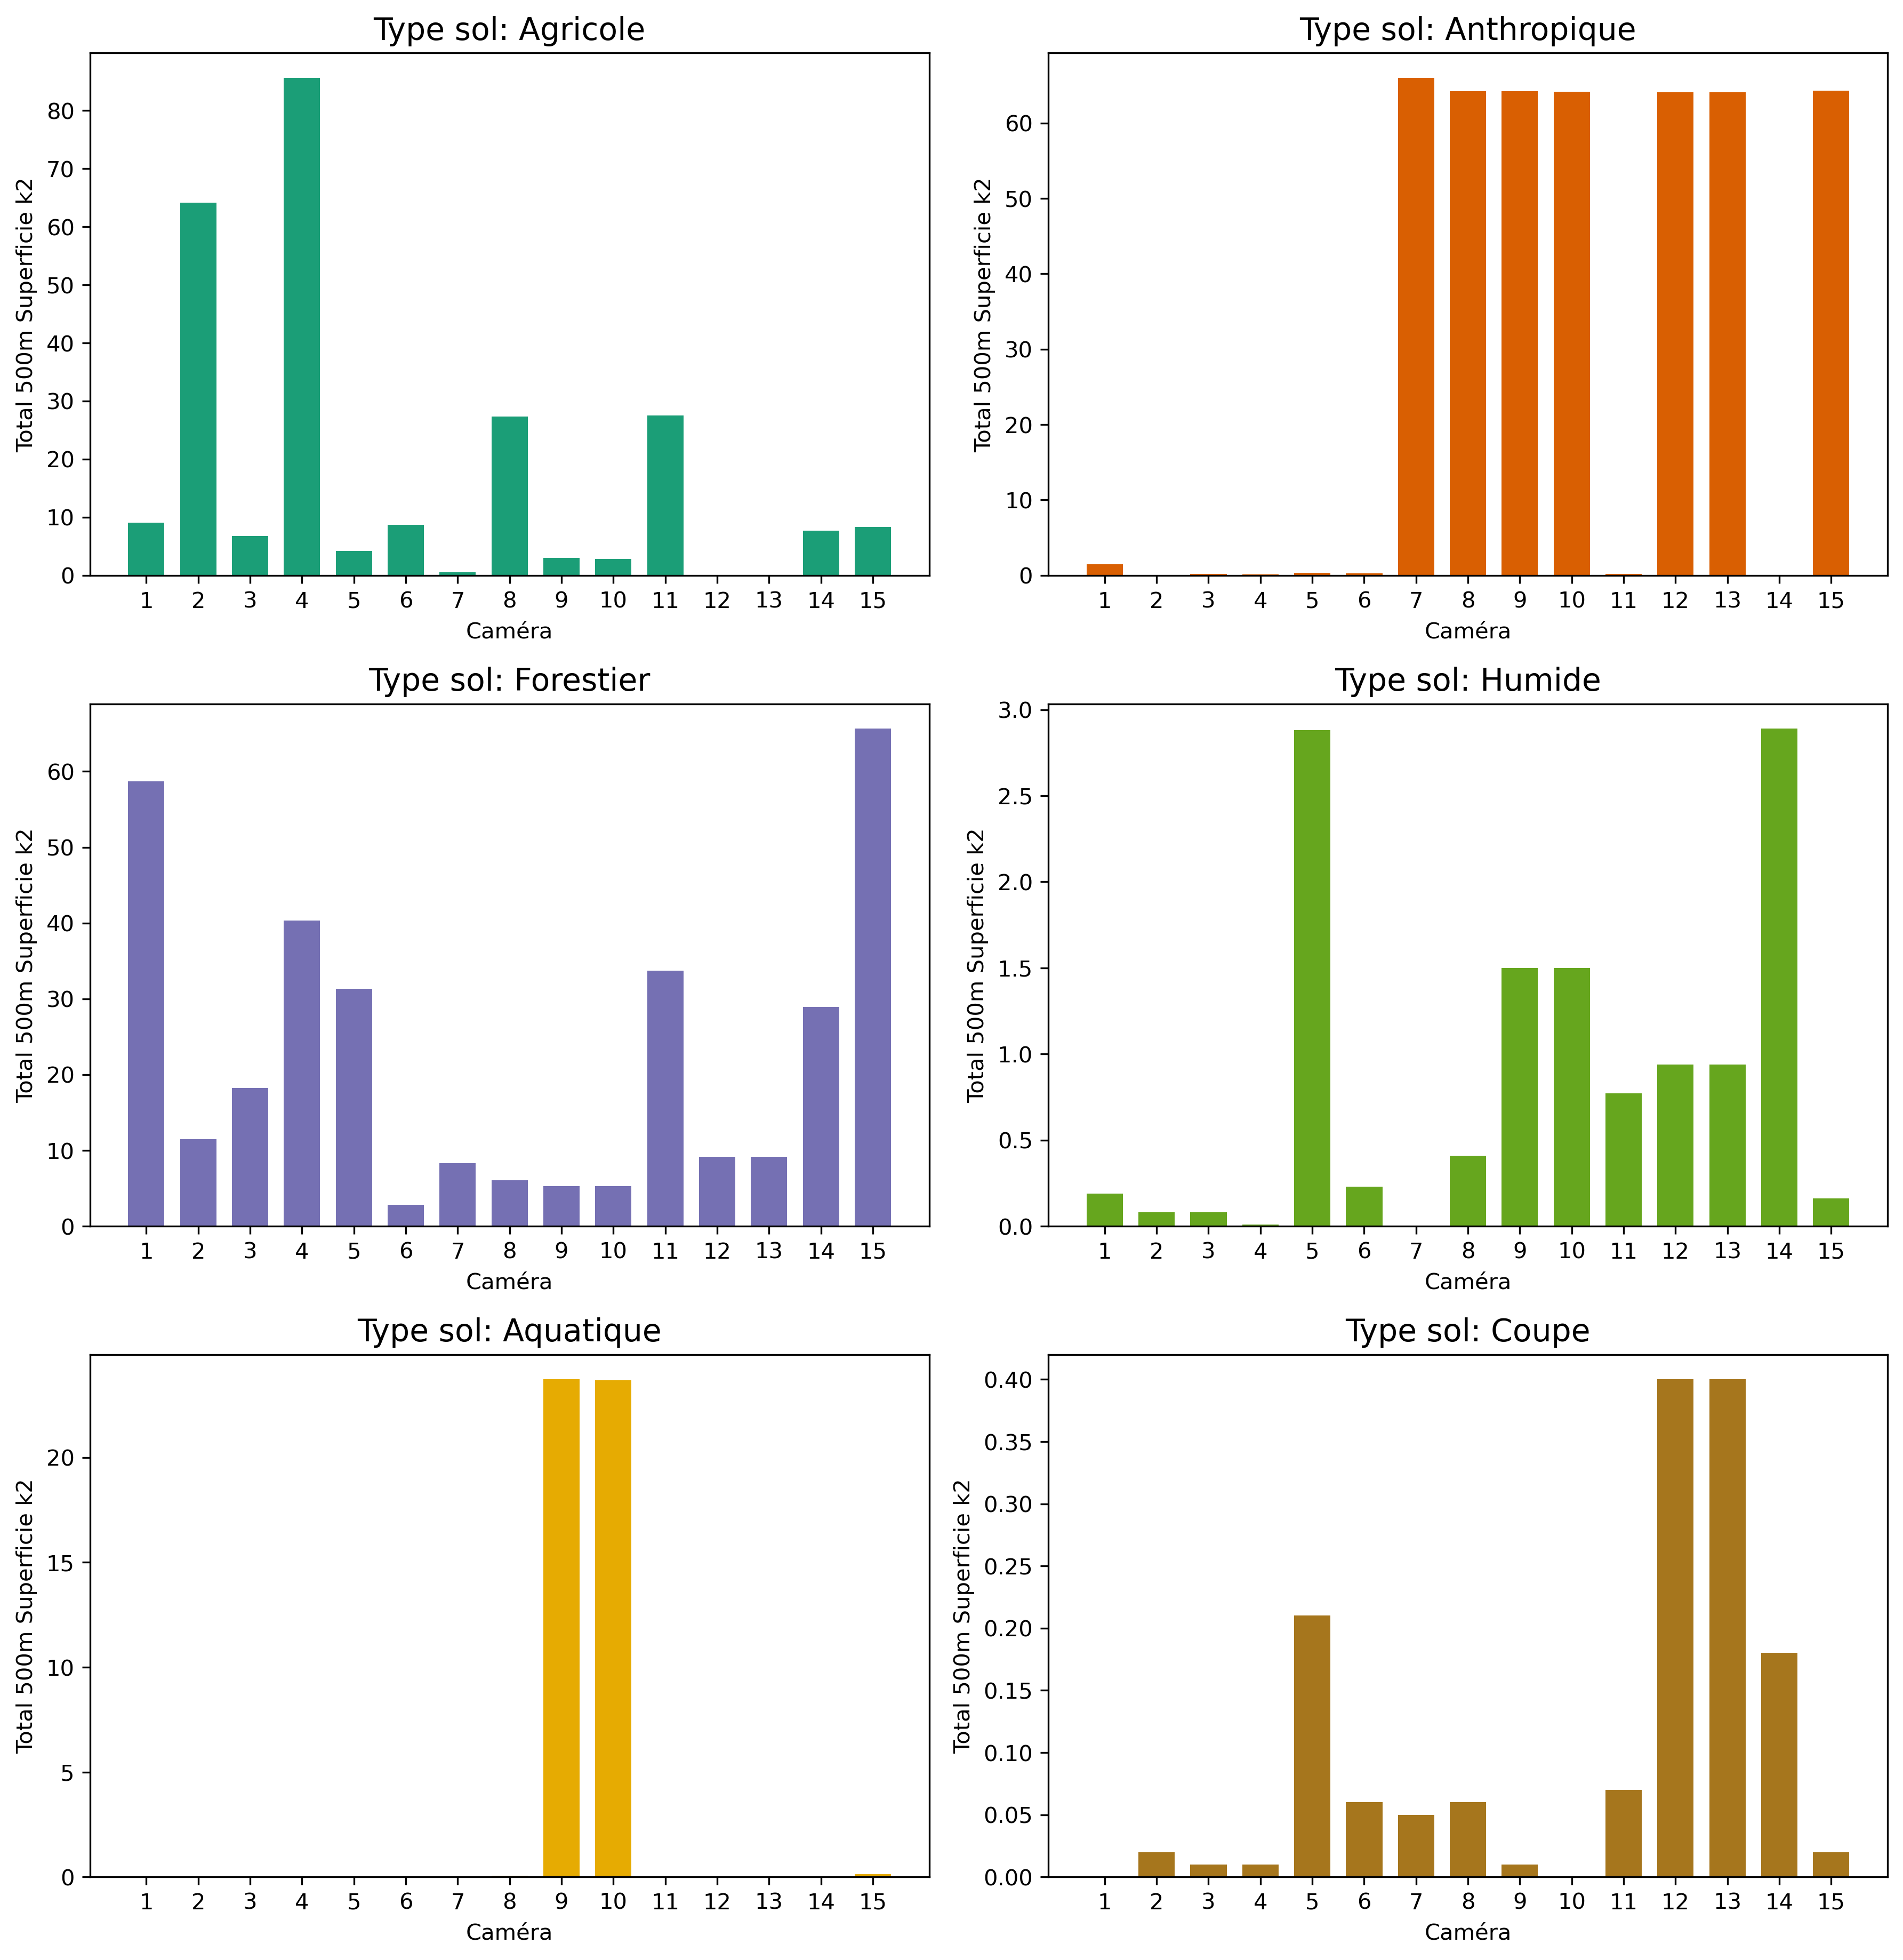

In [167]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

type_sol_categories = sol1km['Type sol'].unique()
n_types = len(type_sol_categories)

n_cols = 2
n_rows = (n_types + 1) // n_cols  

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4), dpi=300)  # Adjust the size as needed
if n_types == 1:
    axs = axs.reshape(1, -1)

# Create a color map 
cmap = cm.get_cmap('Dark2', n_types)
bar_width = 0.7

# Loop through each 'Type sol' type
for i, type_sol in enumerate(type_sol_categories):
    row_idx = i // n_cols
    col_idx = i % n_cols

    ax = axs[row_idx, col_idx]
    type_specific_df = sol1km[sol1km['Type sol'] == type_sol]

    # Plotting for each id
    for id_value in range(15):  #
        id_specific_df = type_specific_df[type_specific_df['id'] == id_value]
        superficie_sum = id_specific_df['500m_Superficie_k2'].sum()
        ax.bar(id_value, superficie_sum, bar_width, label=f'ID {id_value + 1}', color=cmap(i))

    ax.set_title(f'Type sol: {type_sol}', fontsize=14)
    ax.set_xlabel('Caméra')
    ax.set_xticks(range(15))  
    ax.set_xticklabels([str(x + 1) for x in range(15)])
    ax.set_ylabel('Total 500m Superficie k2')
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) #legend or not

last_plot_index = n_rows * n_cols - 1
second_last_plot_index = last_plot_index - 1

# Hide  plot
axs[second_last_plot_index // n_cols, second_last_plot_index % n_cols].set_visible(False)
axs[last_plot_index // n_cols, last_plot_index % n_cols].set_visible(False)

plt.tight_layout()
plt.show()
